In [1]:
# Read the data from the file q-gdpmc1.txt
data <- read.table("q-gdpmc1.txt", header = TRUE)

# Add log transformation of GDP per capita to data
data$log_gdp <- log(data$gdp)

# Add first differencing of log GDP per capita to data
data$growth_rate <- c(NA, diff(data$log_gdp))

#Display the first few rows of the data
print(head(data))

  year month day     gdp  log_gdp   growth_rate
1 1947     1   1 1770691 14.38688            NA
2 1947     4   1 1767976 14.38535 -0.0015344764
3 1947     7   1 1766523 14.38452 -0.0008221816
4 1947    10   1 1793310 14.39957  0.0150498664
5 1948     1   1 1821809 14.41534  0.0157668892
6 1948     4   1 1855345 14.43358  0.0182406991


In [2]:
# Load the necessary libraries
library(stats)

# Fit an AR model to the growth rate data
ar_model <- arima(na.omit(data$growth_rate), order = c(1,0,0))

# Display the fitted model
print(ar_model)


Call:
arima(x = na.omit(data$growth_rate), order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.3705     0.0077
s.e.  0.0572     0.0009

sigma^2 estimated as 8.344e-05:  log likelihood = 861.71,  aic = -1717.43


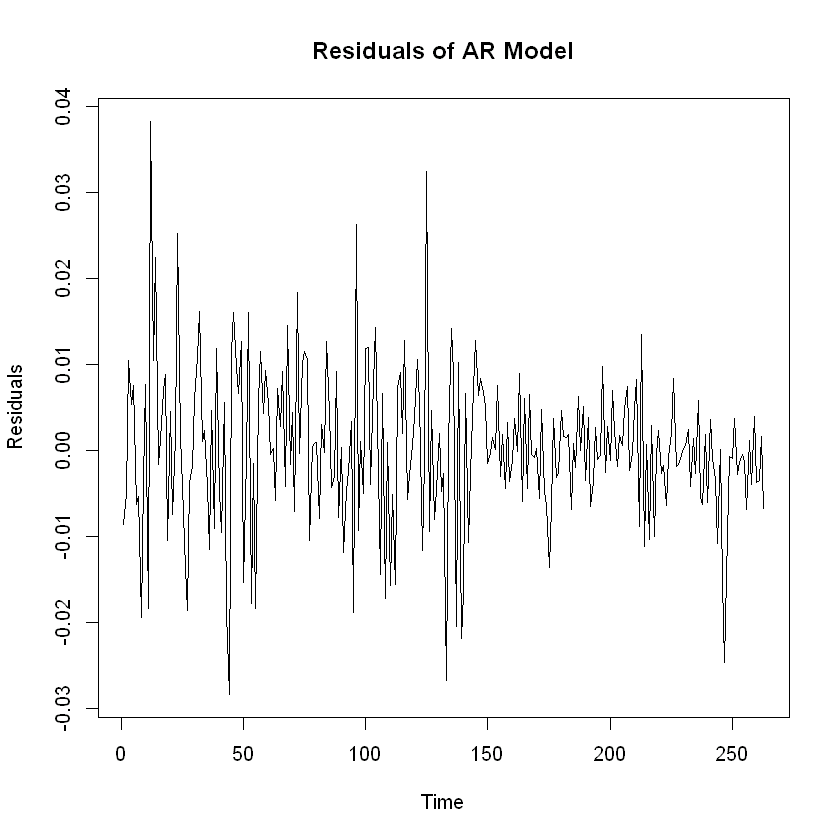


	Box-Ljung test

data:  residuals(ar_model)
X-squared = 26.539, df = 20, p-value = 0.1487


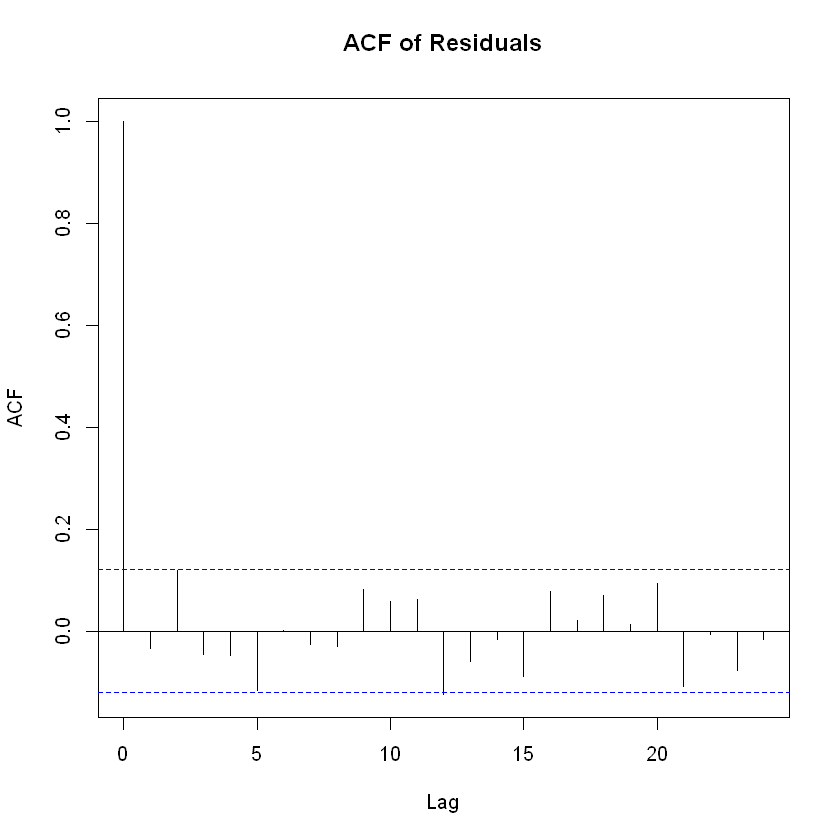

In [3]:
# Plot residuals
plot(residuals(ar_model), main="Residuals of AR(1) Model", ylab="Residuals")

# Plot ACF of residuals
acf(residuals(ar_model), main="ACF of Residuals")

# Perform Ljung-Box test
Box.test(residuals(ar_model), lag=20, type="Ljung-Box")